### **Prepare a Classification Model using Naive Bayes for Salary Data**

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded=files.upload()

Saving SalaryData_Train.csv (1).crdownload to SalaryData_Train.csv (1).crdownload


In [3]:
salary_train = pd.read_csv('SalaryData_Train.csv (1).crdownload')
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
from google.colab import files
uploaded=files.upload()

Saving SalaryData_Test.csv to SalaryData_Test.csv


In [6]:
salary_test = pd.read_csv('SalaryData_Test.csv')
salary_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


### Data Description:

* age -- age of a person
* workclass -- A work class is a grouping of work
* education -- Education of an individuals
* maritalstatus -- Marital status of an individulas
* occupation -- occupation of an individuals
* race -- Race of an Individual
* sex -- Gender of an Individual
* capitalgain -- profit received from the sale of an investment
* capitalloss -- A decrease in the value of a capital asset
* hoursperweek -- number of hours work per week
* native -- Native of an individual
* Salary -- salary of an individual

In [7]:
salary_train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [8]:
salary_test.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [9]:
salary_train['Salary'].value_counts()

 <=50K    17861
 >50K      5854
Name: Salary, dtype: int64

In [10]:
salary_test['Salary'].value_counts()

 <=50K    11360
 >50K      3700
Name: Salary, dtype: int64

### Categorical Variables

In [11]:
categorical = [i for i in salary_train.columns if salary_train[i].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


### Frequency Counts of Categorical Variables

In [12]:
for i in categorical:
    print(salary_train[i].value_counts())

 Private             17481
 Self-emp-not-inc     1977
 Local-gov            1648
 State-gov            1005
 Self-emp-inc          846
 Federal-gov           749
 Without-pay            10
Name: workclass, dtype: int64
 HS-grad         7795
 Some-college    5245
 Bachelors       3980
 Masters         1253
 Assoc-voc       1020
 11th             824
 Assoc-acdm       785
 10th             657
 7th-8th          436
 Prof-school      412
 9th              366
 Doctorate        297
 12th             290
 5th-6th          217
 1st-4th          106
 Preschool         33
Name: education, dtype: int64
 Married-civ-spouse       11001
 Never-married             7670
 Divorced                  3340
 Separated                  740
 Widowed                    654
 Married-spouse-absent      295
 Married-AF-spouse           16
Name: maritalstatus, dtype: int64
 Prof-specialty       3176
 Craft-repair         3144
 Exec-managerial      3102
 Adm-clerical         2998
 Sales                2827
 Other

### Check for Cardinality in each Categorical Variables

In [13]:
for i in categorical:
    print(i, 'contains ', salary_train[i].nunique(), 'labels...')

workclass contains  7 labels...
education contains  16 labels...
maritalstatus contains  7 labels...
occupation contains  14 labels...
relationship contains  6 labels...
race contains  5 labels...
sex contains  2 labels...
native contains  41 labels...
Salary contains  2 labels...


### View Frequency Distribution of Categorical Variables

In [14]:
for var in categorical:

    print(salary_train[var].value_counts()/np.float(len(salary_train)))

 Private             0.737097
 Self-emp-not-inc    0.083361
 Local-gov           0.069489
 State-gov           0.042376
 Self-emp-inc        0.035672
 Federal-gov         0.031582
 Without-pay         0.000422
Name: workclass, dtype: float64
 HS-grad         0.328681
 Some-college    0.221159
 Bachelors       0.167819
 Masters         0.052834
 Assoc-voc       0.043009
 11th            0.034744
 Assoc-acdm      0.033100
 10th            0.027703
 7th-8th         0.018384
 Prof-school     0.017372
 9th             0.015433
 Doctorate       0.012523
 12th            0.012228
 5th-6th         0.009150
 1st-4th         0.004470
 Preschool       0.001391
Name: education, dtype: float64
 Married-civ-spouse       0.463864
 Never-married            0.323410
 Divorced                 0.140833
 Separated                0.031203
 Widowed                  0.027576
 Married-spouse-absent    0.012439
 Married-AF-spouse        0.000675
Name: maritalstatus, dtype: float64
 Prof-specialty       0.13391

### List of Numerical Variables

In [15]:
numerical_features=[feature for feature in salary_train.columns if salary_train[feature].dtypes != 'O']
print('Number of numerical variables:', len(numerical_features))
# Visualize the numerical variables
salary_train[numerical_features].head()


Number of numerical variables: 5


,age,educationno,capitalgain,capitalloss,hoursperweek
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40


### **Discrete Feature**

In [16]:
discrete_feature=[feature for feature in numerical_features if len(salary_train[feature].unique())<25]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 1


### **Continuous Variable**

In [17]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 4


In [18]:
salary_train.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.041636,0.076487,0.060051,0.101345
educationno,0.041636,1.000000,0.122892,0.079914,0.151378
capitalgain,0.076487,0.122892,1.000000,-0.031927,0.080157
capitalloss,0.060051,0.079914,-0.031927,1.000000,0.054038
hoursperweek,0.101345,0.151378,0.080157,0.054038,1.000000


## **Exploratory Data Analysis**

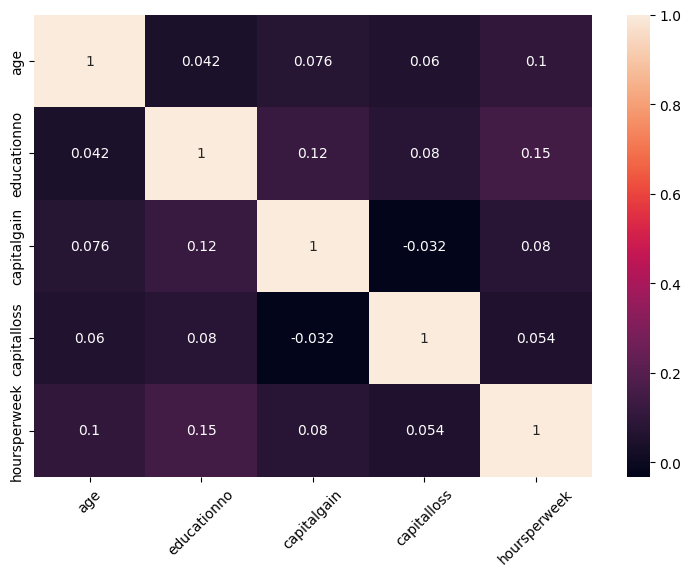

In [19]:
fig = plt.figure(figsize=(9,6))
sns.heatmap(salary_train.corr(),annot=True)
plt.xticks(rotation=45);

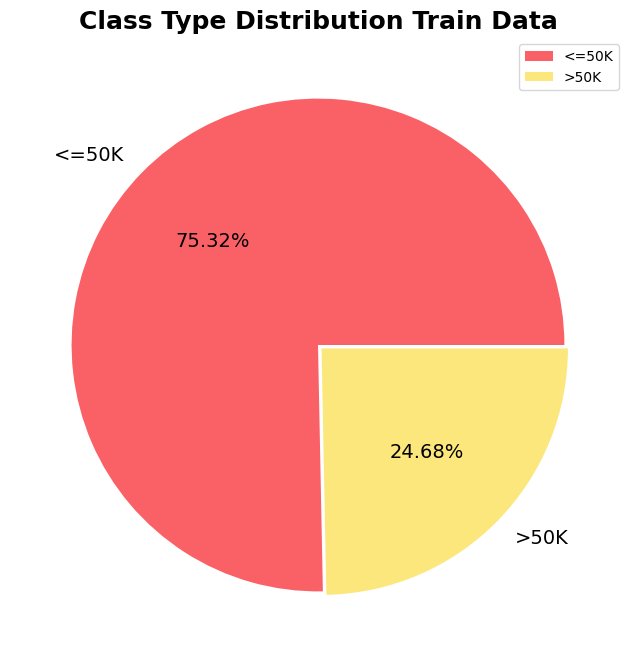

In [20]:
plt.figure(figsize=(8,8))
plt.pie(salary_train['Salary'].value_counts(), labels= ['<=50K','>50K'], autopct= '%.2f%%',
        colors= ["#F96167", "#FCE77D"], explode=[0,0.02], textprops= {'fontsize':14})
plt.legend(loc='best')
plt.title("Class Type Distribution Train Data", fontsize= 18, fontweight= 'bold')
plt.show()

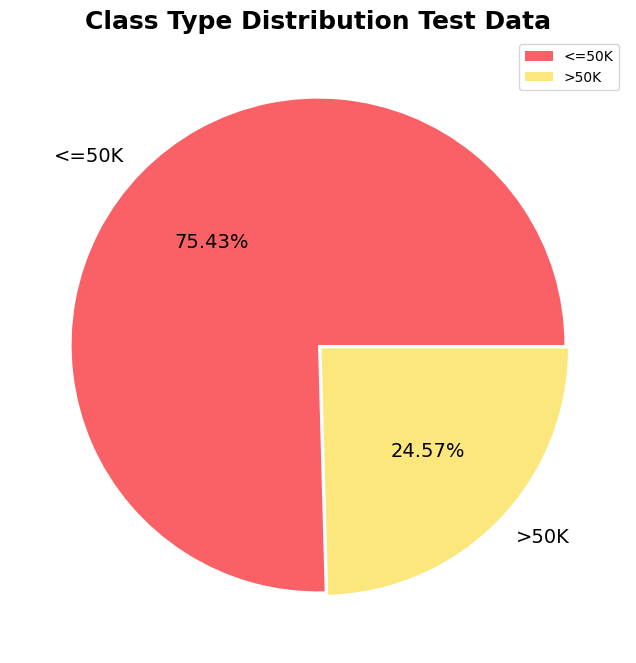

In [21]:
plt.figure(figsize=(8,8))
plt.pie(salary_test['Salary'].value_counts(), labels= ['<=50K','>50K'], autopct= '%.2f%%',
        colors= ["#F96167", "#FCE77D"], explode= [0,0.02], textprops= {'fontsize':14})
plt.legend(loc='best')
plt.title("Class Type Distribution Test Data", fontsize= 18, fontweight= 'bold')
plt.show()

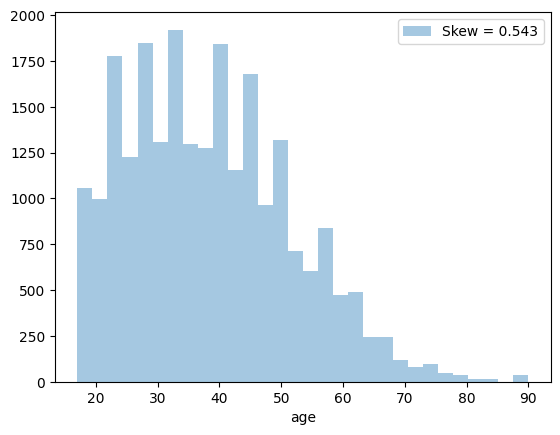

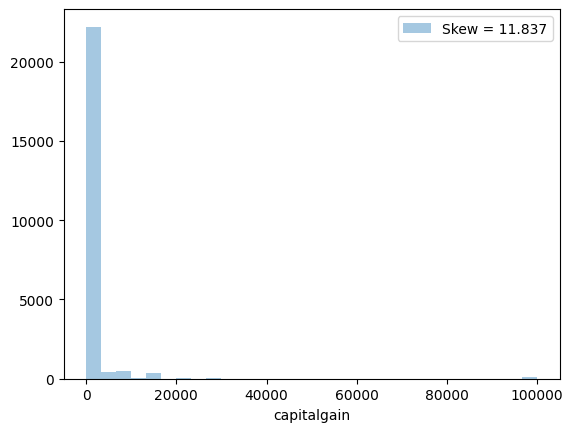

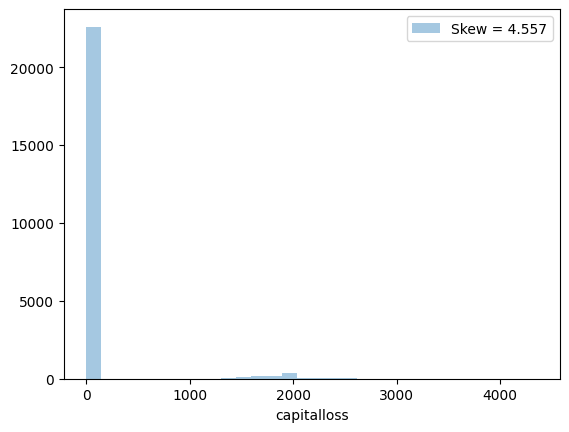

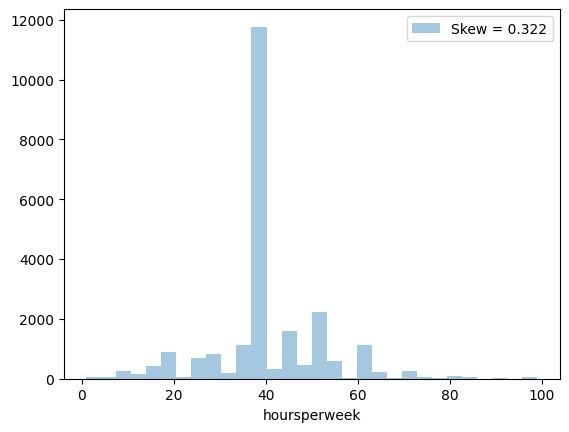

In [22]:
#Univariate plots
for feat in continuous_feature:
    skew = salary_train[feat].skew()
    sns.distplot(salary_train[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

### Outliers Detection

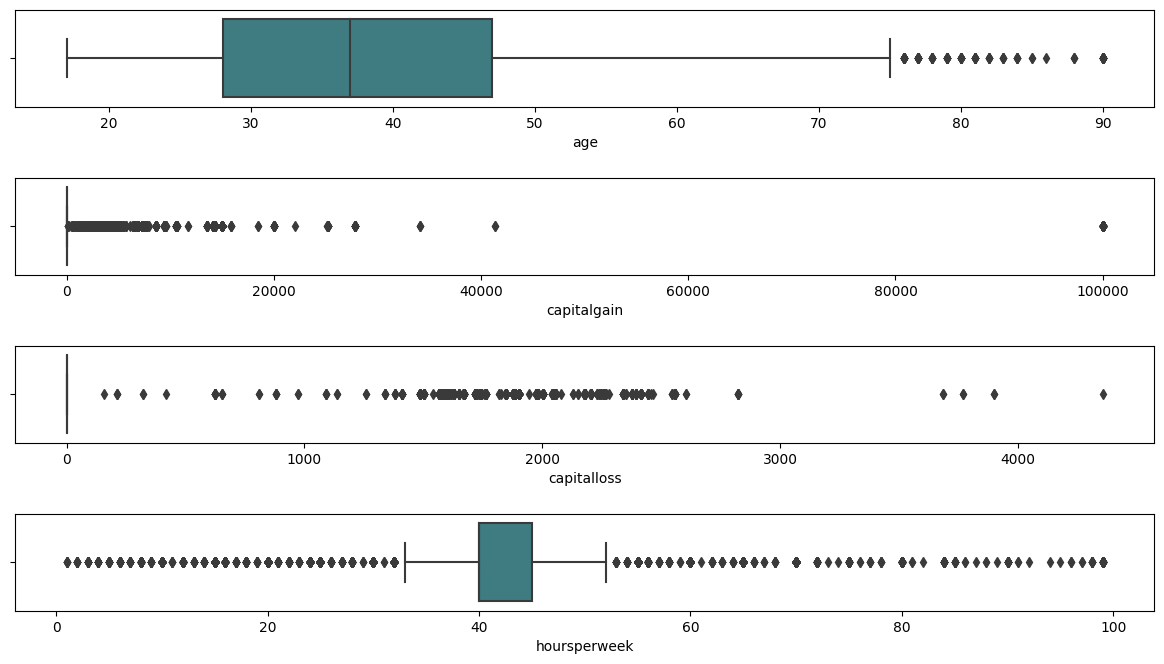

In [23]:
outlier1 = salary_train.copy()
fig, axes=plt.subplots(4,1,figsize=(12,7),sharex=False,sharey=False)
sns.boxplot(x='age',data=outlier1,palette='crest',ax=axes[0])
sns.boxplot(x='capitalgain',data=outlier1,palette='crest',ax=axes[1])
sns.boxplot(x='capitalloss',data=outlier1,palette='crest',ax=axes[2])
sns.boxplot(x='hoursperweek',data=outlier1,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

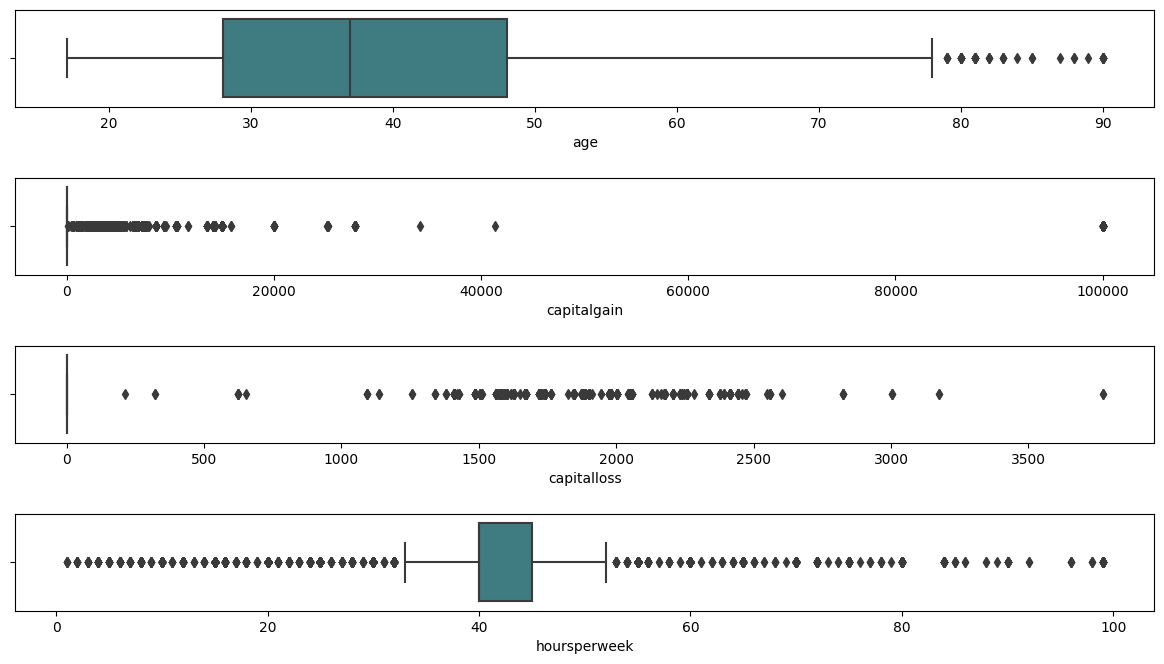

In [24]:
outlier2 = salary_test.copy()
fig, axes=plt.subplots(4,1,figsize=(12,7),sharex=False,sharey=False)
sns.boxplot(x='age',data=outlier2,palette='crest',ax=axes[0])
sns.boxplot(x='capitalgain',data=outlier2,palette='crest',ax=axes[1])
sns.boxplot(x='capitalloss',data=outlier2,palette='crest',ax=axes[2])
sns.boxplot(x='hoursperweek',data=outlier2,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

There are lot of outliers present in the dataframe but we can't drop them because they are present in a very large quantity and can be important for model building

In [25]:
categorical_features=[feature for feature in salary_train.columns if salary_train[feature].dtype=='O']
print('Number of Categorical Features:',len(categorical_features), '\n', categorical_features)
salary_train[categorical_features].head()

Number of Categorical Features: 9 
 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


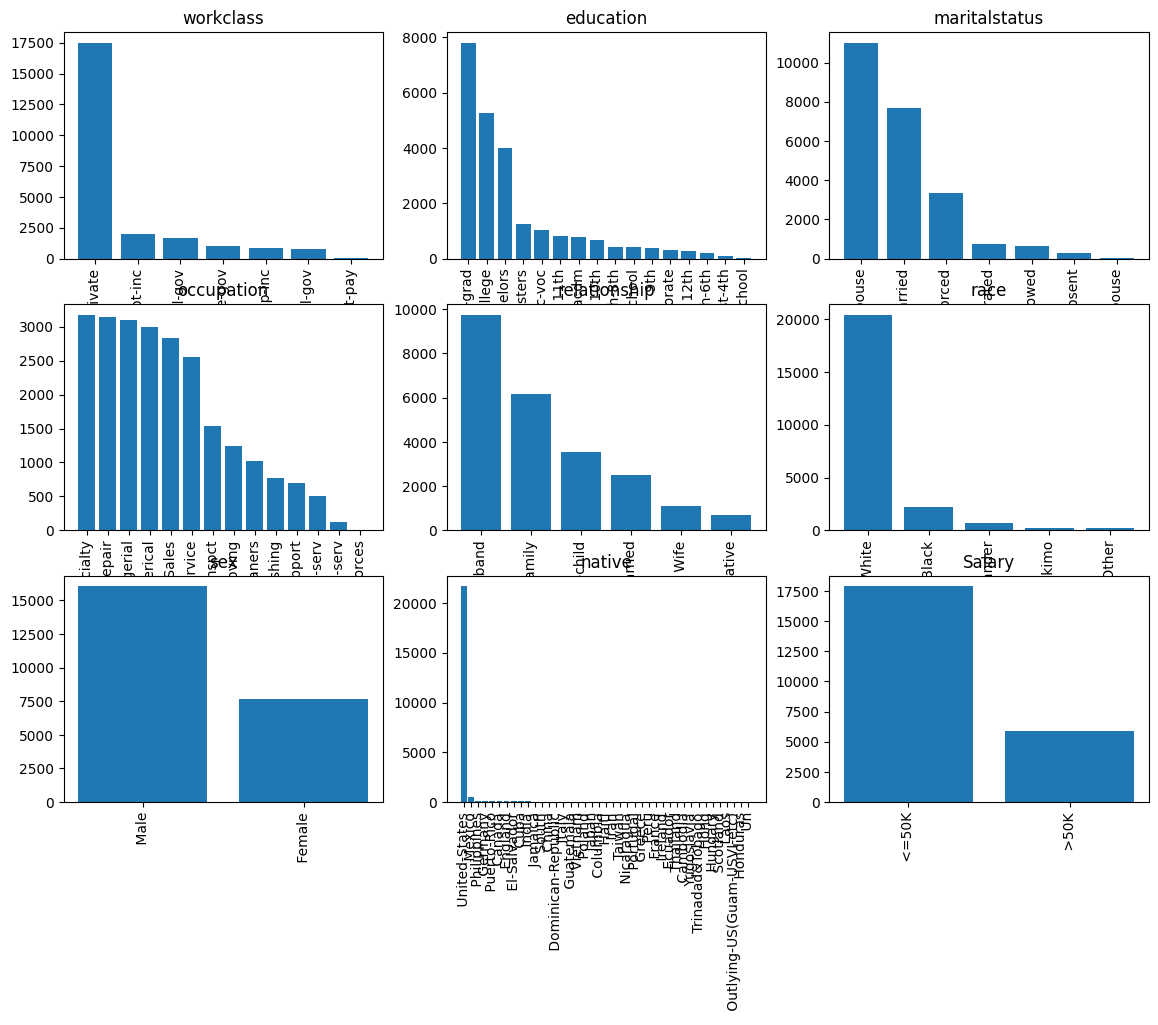

In [26]:
fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(14,10))
counter = 0

for cat_column in categorical_features:
    value_counts = salary_train[cat_column].value_counts()
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    axs[trace_x, trace_y].set_title(cat_column)

    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    counter += 1

plt.show()

## **Data Preprocessing**

In [27]:
le = LabelEncoder()

In [28]:
def encoding(i):
    cols = salary_train.columns
    salary_train[cols[i]]=le.fit_transform(salary_train[cols[i]])
    salary_test[cols[i]]=le.fit_transform(salary_test[cols[i]])

In [29]:
a = [1,2,4,5,6,7,8,12,13]
for i in a:
    encoding(i)

In [30]:
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23711,26,2,9,13,4,9,1,4,1,0,0,50,38,0
23712,27,5,9,13,4,12,1,4,1,0,0,12,38,0
23713,28,2,1,7,4,6,4,4,0,0,0,40,25,0
23714,50,3,9,13,2,11,0,4,1,0,0,60,38,1


In [31]:
salary_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


### **Model Building**

In [32]:
X_train = salary_train.drop('Salary',axis=1)
y_train = salary_train[['Salary']]
X_test = salary_test.drop('Salary',axis=1)
y_test = salary_test[['Salary']]

In [33]:
X_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,38
1,50,4,9,13,2,3,0,4,1,0,0,13,38
2,38,2,11,9,0,5,1,4,1,0,0,40,38
3,53,2,1,7,2,5,0,2,1,0,0,40,38
4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23711,26,2,9,13,4,9,1,4,1,0,0,50,38
23712,27,5,9,13,4,12,1,4,1,0,0,12,38
23713,28,2,1,7,4,6,4,4,0,0,0,40,25
23714,50,3,9,13,2,11,0,4,1,0,0,60,38


In [34]:
y_train

,Salary
0,0
1,0
2,0
3,0
4,0
...,...
23711,0
23712,0
23713,0
23714,1


In [35]:
print("Shape of X_train :",X_train.shape)
print("Shape of X_test  :",X_test.shape)
print("Shape of y_train :",y_train.shape)
print("Shape of y_test  :",y_test.shape)

Shape of X_train : (23716, 13)
Shape of X_test  : (15060, 13)
Shape of y_train : (23716, 1)
Shape of y_test  : (15060, 1)


## **Model Training  and  Model Testing**

In [36]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

## Using Gaussian Naive Bayes

In [37]:
gau_clf = GaussianNB()
gau_clf.fit(X_train, y_train)

print_score(gau_clf, X_train, y_train, X_test, y_test, train=True)
print_score(gau_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 79.66%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1    2  accuracy     macro avg  \
precision      0.812183     0.681963  1.0  0.796635      0.831382   
recall         0.949555     0.330031  1.0  0.796635      0.759862   
f1-score       0.875513     0.444803  1.0  0.796635      0.773439   
support    17861.000000  5854.000000  1.0  0.796635  23716.000000   

           weighted avg  
precision      0.780047  
recall         0.796635  
f1-score       0.769203  
support    23716.000000  
_______________________________________________
Confusion Matrix: 
 [[16960   901     0]
 [ 3922  1932     0]
 [    0     0     1]]

Test Result:
Accuracy Score: 79.60%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1    2  accuracy     macro avg  \
precision      0.812566     0.675375  0.0  0.796016      0.495980   
recall         0.948327     0.328378  


## Using Multinomial Naive Bayes

In [38]:
mul_clf = MultinomialNB()
mul_clf.fit(X_train, y_train)

print_score(mul_clf, X_train, y_train, X_test, y_test, train=True)
print_score(mul_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 7.52%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1         2  accuracy     macro avg  \
precision      0.490633     0.621908  0.000049  0.075181      0.370863   
recall         0.030793     0.210454  1.000000  0.075181      0.413749   
f1-score       0.057950     0.314486  0.000097  0.075181      0.124178   
support    17861.000000  5854.000000  1.000000  0.075181  23716.000000   

           weighted avg  
precision      0.523016  
recall         0.075181  
f1-score       0.121270  
support    23716.000000  
_______________________________________________
Confusion Matrix: 
 [[  550   749 16562]
 [  571  1232  4051]
 [    0     0     1]]

Test Result:
Accuracy Score: 7.54%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1    2  accuracy     macro avg  \
precision      0.495810     0.624500  0.0  0.075365      0.373437   
recall         

## Using Categorical Naive Bayes

In [39]:
cat_clf = CategoricalNB()
cat_clf.fit(X_train, y_train)

print_score(cat_clf, X_train, y_train, X_test, y_test, train=True)
print_score(cat_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 85.75%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1    2  accuracy     macro avg  \
precision      0.887302     0.746614  0.0  0.857522      0.544639   
recall         0.928783     0.640246  0.0  0.857522      0.523010   
f1-score       0.907569     0.689351  0.0  0.857522      0.532307   
support    17861.000000  5854.000000  1.0  0.857522  23716.000000   

           weighted avg  
precision      0.852537  
recall         0.857522  
f1-score       0.853666  
support    23716.000000  
_______________________________________________
Confusion Matrix: 
 [[16589  1272     0]
 [ 2106  3748     0]
 [    1     0     0]]

Test Result:
Accuracy Score: 84.04%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.916248     0.650628  0.840372      0.783438      0.850990
recall         0.867694   

As Categorical Naive Bayes is scoring better result than other models we are going to use this model for final model building

## **Model Validation**

## Sklearn Naive Bayes Classifier

In [40]:
# instantiating the model
model_gau = GaussianNB()
model_mul = MultinomialNB()
model_cat = CategoricalNB()

# fit the model
model_gau.fit(X_train, y_train)
model_mul.fit(X_train, y_train)
model_cat.fit(X_train, y_train)

CategoricalNB()

In [41]:
#Predictions
y_pred_gau = model_gau.predict(X_test)
y_pred_mul = model_mul.predict(X_test)
y_pred_cat = model_cat.predict(X_test)

print('GaussianNB Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gau)))
print('MultinomialNB Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_mul)))
print('CategoricalNB Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_cat)))


GaussianNB Model accuracy score: 0.7960
MultinomialNB Model accuracy score: 0.0754
CategoricalNB Model accuracy score: 0.8404


## Print the classification report

In [42]:
print('GaussianNB Model', classification_report(y_test, y_pred_gau))
print('MultinomialNB Model', classification_report(y_test, y_pred_mul))
print('CategoricalNB Model', classification_report(y_test, y_pred_cat))

GaussianNB Model               precision    recall  f1-score   support

           0       0.81      0.95      0.88     11360
           1       0.68      0.33      0.44      3700
           2       0.00      0.00      0.00         0

    accuracy                           0.80     15060
   macro avg       0.50      0.43      0.44     15060
weighted avg       0.78      0.80      0.77     15060

MultinomialNB Model               precision    recall  f1-score   support

           0       0.50      0.03      0.06     11360
           1       0.62      0.21      0.32      3700
           2       0.00      0.00      0.00         0

    accuracy                           0.08     15060
   macro avg       0.37      0.08      0.12     15060
weighted avg       0.53      0.08      0.12     15060

CategoricalNB Model               precision    recall  f1-score   support

           0       0.92      0.87      0.89     11360
           1       0.65      0.76      0.70      3700

    accuracy     

Categorical Naive Bayes scored better accuracy, F1 score, precision and Receall for both Binary outputs. Hence, we are going to continue using the Categorical Model for further Metrics

### Compare the train-set and test-set accuracy to check for overfitting

In [43]:
# print the scores on training and test set

print('Training set score: {:.2f}%'.format(model_cat.score(X_train, y_train)*100))
print('Test set score: {:.2f}%'.format(model_cat.score(X_test, y_test)*100))


Training set score: 85.75%
Test set score: 84.04%


# Conclusion :

A) For Gaussian    = Training accuracy : 79.53%/
                     Testing accuracy  : 79.46%

B) For Multinomial = Training accuracy : 77.29% /
                      Testing accuracy  : 77.50%

C) For Categorical = Training accuracy : 85.71%/
                     Testing accuracy  : 85.66%

So we can see the model accuracy is best for Categorical Naive Bayes algorithm.